<a href="https://colab.research.google.com/github/Baroka-wp/dive_ML/blob/master/Sprint4_Regression_Logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np 
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import random

## [Problème 1] Fonction hypothétique

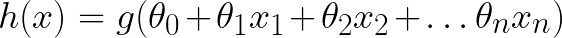

Le nombre e est la constante mathématique, environ 2,71828. Cette fonction s'appelle la sigmoïde.
La régression logistique donne non seulement une prédiction, mais une probabilité (80 % de chances que cette personne ait survécu).

In [22]:
x = np.arange(-50,50,1).reshape(-1,1)
bias = np.ones(x.shape[0])
X = np.concatenate([bias.reshape(-1,1),x], axis=1)
len(X)

100

In [ ]:
def generateXvector(X):
    """ Prendre la matrice originale des variables indépendantes et ajouter une ligne de 1 qui correspond à x_0
        Paramètres :
          X : matrice des variables indépendantes
        Valeur de retour : la matrice qui contient toutes les valeurs de l'ensemble de données, sans inclure les variables de résultats. 
    """    
    vectorX = np.c_[np.ones((len(X), 1)), X]
    
    return vectorX

In [17]:
theta = np.random.randn(X.shape[1],1)
print('theta:\n', theta, theta.shape)

theta:
 [[ 0.009775 ]
 [-0.4109527]] (2, 1)


###Fonction lineaire

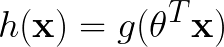

In [21]:
#linear function
z = X.dot(theta)
z.shape

(100, 1)

### Fonction sigmoid

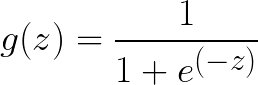

La fonction g() est une fonction sigmoïde qui permet à la fonction d'hypothèse d'aboutir à un nombre compris entre 0 et 1. La fonction sigmoïde est définie comme suit :


In [7]:
g = 1/(1+ np.exp(-z))
g.shape

(100, 1)

In [8]:
def sigmoid(X):
  return 1/ (1 + np.exp(-X)) # z is linear function

Si 'Z' va à l'infini, Y(prédit) deviendra 1 et si 'Z' va à l'infini négatif, Y(prédit) deviendra 0.

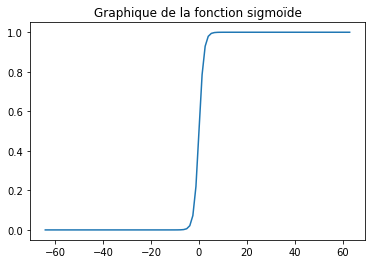

In [9]:
plt.plot(z,g)
plt.title("Graphique de la fonction sigmoïde")
plt.show()

Prédiction du modèle pour la régression logistique

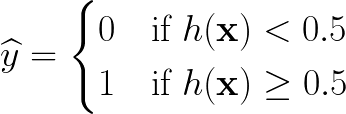

Une caractéristique intéressante de cette ligne sigmoïde est que la fonction prend la valeur 0,5 comme seuil lorsque z = 0 pour sortir sa prédiction. Plus précisément, avec une entrée positive, la fonction générera une probabilité supérieure à 0,5 (c'est-à-dire en la prédisant comme la classe positive) ou avec une valeur négative, la classe négative sera projetée.

## [Problem 4] Objective function
#### Fonction cout
L'idée d'évaluer le modèle logistique est de mesurer chaque différence créée par le résultat réel et le résultat prévu. Un rappel important ici est que nous devons utiliser la valeur générée par la fonction d'hypothèse avant de faire des prédictions. En effet, s'il existe deux modèles qui renvoient la probabilité estimée de 0,6 et 0,9, leurs prédictions appartiendront toutes deux à la classe positive. Cependant, nous préférerions de loin utiliser le modèle 0.9 plutôt que celui 0.6. Voici la formule pour évaluer une instance de formation.

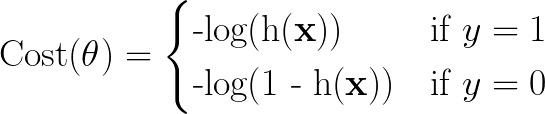

In [12]:
J1 = - np.log(z) # pour y = 1
J0 = - np.log(1-z) # pour y = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


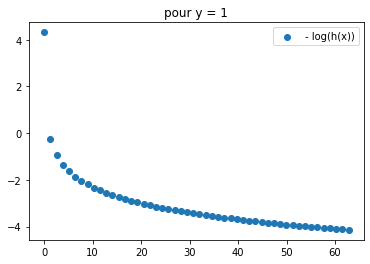

In [13]:
plt.scatter(z,J1,label='- log(h(x))')
plt.title("pour y = 1")
plt.legend()
plt.show()

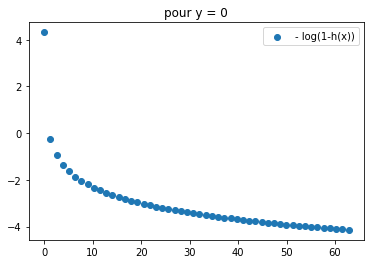

In [14]:
plt.scatter(z,J1,label='- log(1-h(x))')
plt.title("pour y = 0")
plt.legend()
plt.show()

Par certaines combinaisons appropriées de formules mathématiques, la fonction de coût du modèle peut être exprimée en une seule formule :

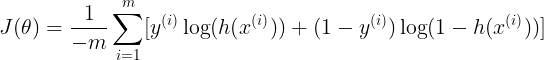

- J( θ) = La fonction de coût qui prend les thêta comme entrées
- m = nombre d'instances
- x(i) = entrée (caractéristiques) du i-ième exemple d'apprentissage
- y(i) = sortie (caractéristiques) du i-ième exemple d'apprentissage

In [15]:
def cost_function(y, y_pred):
  y_new = y.reshape(len(y),1)
  cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
  return cost_value 


##【problem2】Steepest descent


En optimisant la régression logistique, la descente de gradient fonctionne à peu près de la même manière que pour la régression multivariée . En bref, l'algorithme mettra simultanément à jour les valeurs thêta après l'ajustement de chaque modèle pour trouver le minimum global de notre fonction de coût. Gradient Descent est capable d'effectuer une telle tâche car faire des pas dans la direction opposée du gradient nous conduira progressivement au minimum de toute fonction.

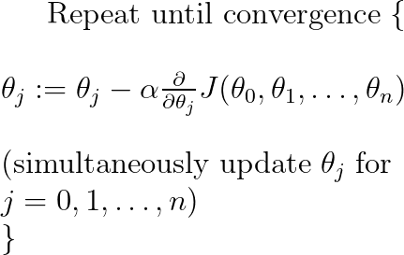

L' α symbole représente le taux d'apprentissage de l'algorithme, qui contrôle la vitesse à laquelle les apprend des modèles. 

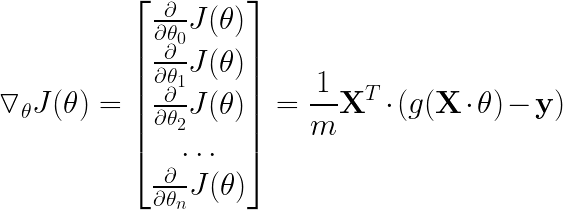

Vecteur de dégradé


## la descente de gradient
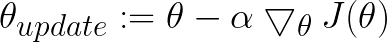

##【problem 3】Estimated


y_pred = sigmoid(vectorX.dot(theta_update))


## SCRATCH LOGISTIC REGRESSION

In [91]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data

    """

    def __init__(self, lr, iter, verbose):
        # Record hyperparameters as attributes
        self.iter = iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        m = len(X)
        y_new = y.reshape(len(y),1)
        self.theta = np.random.randn(len(X[0])+1,1)
        vectorX = self._generateXvector(X)
        z = vectorX.dot(self.theta)

        for i in range(self.iter):
          gradients = 2/m * vectorX.T.dot(self._sigmoid(z) - y_new)
          self.theta = self.theta - self.lr * gradients
          y_pred = self._sigmoid(vectorX.dot(self.theta))
          loss = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
          #Calculate la perte pour chaque iteration 
          self.val_loss[i] = loss
       
        if self.verbose:
            #Output learning process when verbose is set to True
            print()
            # courbe d'apprentissage
            plt.plot(np.arange(1,self.iter),self.val_loss[1:], color = 'red')
            plt.title('Cost function Graph')
            plt.xlabel('Number of iterations')
            plt.ylabel('Cost')
        
        # save theta
        np.save('theta', self.theta)
        
        return self.theta

    def _generateXvector(self, X):
      """ Prendre la matrice originale des variables indépendantes et ajouter une ligne de 1 qui correspond à x_0
          Paramètres :
            X : matrice des variables indépendantes
          Valeur de retour : la matrice qui contient toutes les valeurs de l'ensemble de données, sans inclure les variables de résultats. 
      """    
      vectorX = np.c_[np.ones((len(X), 1)), X]
      
      return vectorX


    def _sigmoid(self,X):
      return 1/ (1 + np.exp(-X)) # z is linear function


    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        vectorX = self._generateXvector(X)
        z = vectorX.dot(self.self.theta)
        logistic_function = self._sigmoid(z)
        for i in range(len(logistic_function)):
            if logistic_function[i] >= 0.5:
                logistic_function[i] = 1
            else:
                logistic_function[i] = 0
        y_predected_cls = np.concatenate((logistic_function.reshape(len(logistic_function),1), y_test.reshape(len(y_test),1)),1)

        return y_predected_cls


    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """

        pass
        return self.sigmoid(X)


## [Problem 5] Learning and estimation


In [79]:
def column(matrix, i):
    """ Returning all the values in a specific columns
         Parameters:
          X: the input matrix
          i: the column
     Return value: an array with desired column
    """
    return [row[i] for row in matrix]

def accuracy_LR(lr,iter, theta, X_test, y_test):
    """ Returning the accuracy score for a training model
      
    """
    vectorX = np.c_[np.ones((len(X_test), 1)), X_test]
    hypo_line = np.dot(vectorX,theta)
    logistic_function = sigmoid(hypo_line)

    for i in range(len(logistic_function)):
        if logistic_function[i] >= 0.5:
            logistic_function[i] = 1
        else:
            logistic_function[i] = 0
    last1 = np.concatenate((logistic_function.reshape(len(logistic_function),1), y_test.reshape(len(y_test),1)),1)
    count = 0
    for i in range(len(y_test)):
        if last1[i][0] == last1[i][1]:
            count = count+1
    acc = count/(len(y_test))
    return acc

## Verification

In [27]:
# data set
from sklearn.datasets import load_iris
data = load_iris().data 
target = load_iris().target.reshape(-1,1)

In [28]:
iris_ar = np.concatenate([data, target], axis=1)
iris_df = pd.DataFrame(iris_ar)
iris_df.shape

(150, 5)

In [30]:
#mettre en place X, et y
X = iris_df.loc[iris_df[4]!=0,2:3].values 
y = iris_df.loc[iris_df[4]!=0,4].values

In [31]:
# split train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Avec SCRATCH LOGISTIC REGRESSION

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log



[[19.37271702]
 [12.22285673]
 [13.6930292 ]]


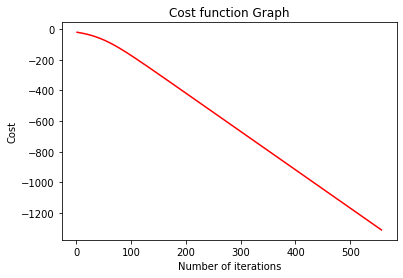

In [92]:
model = ScratchLogisticRegression(0.01,1000, True)
theta_update = model.fit(X_train, y_train) 
print(theta_update)

In [80]:
accuracy_LR(0.01,10000, theta_update, X_test, y_test)

0.4

## Avec Skeaner

In [81]:
# fit(X,y)
classifier = LogisticRegression(random_state = 0, penalty = 'none')
classifier.fit(X_train, y_train)
classifier.intercept_, classifier.coef_


(array([0.55527623]), array([[5.63984064, 3.4425004 ]]))

In [83]:
# prediction & accuracy
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.95

## [Problem 7] Visualization of decision area

In [84]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X,y,model,step=0.01,title='decision region',xlabel='xlabel',ylabel='ylabel',target_names=['versicolor','virginica']):
    #setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    #pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    #plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0,mesh_f1,y_pred,n_class-1,cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0,mesh_f1,y_pred,n_class-1,colors='y', linewidths=3,alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:,0], X[y==target][:,1],s=80,color=scatter_color[i],label=target_names[i],marker='o')
    patches = [mpatches.Patch(color=scatter_color[i],label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

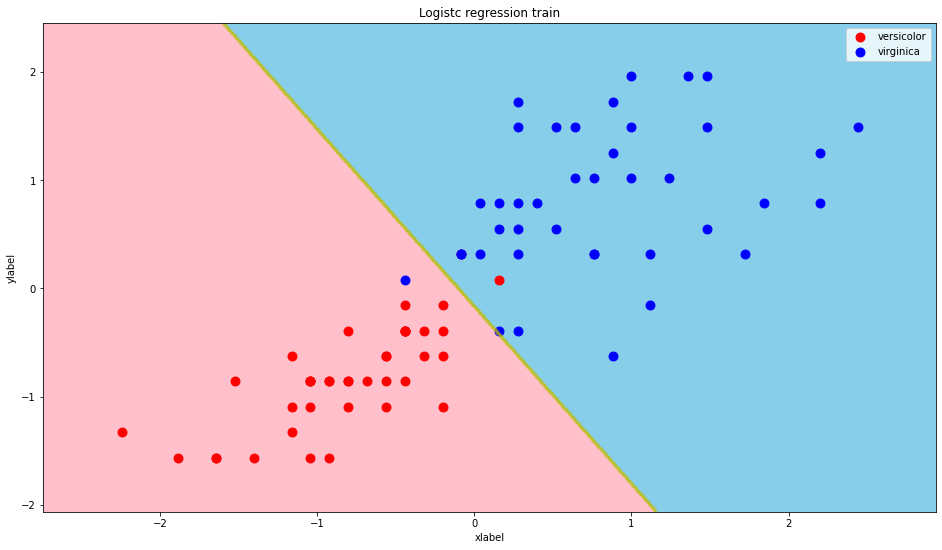

In [85]:
fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_train,y_train,classifier,title='Logistc regression train')

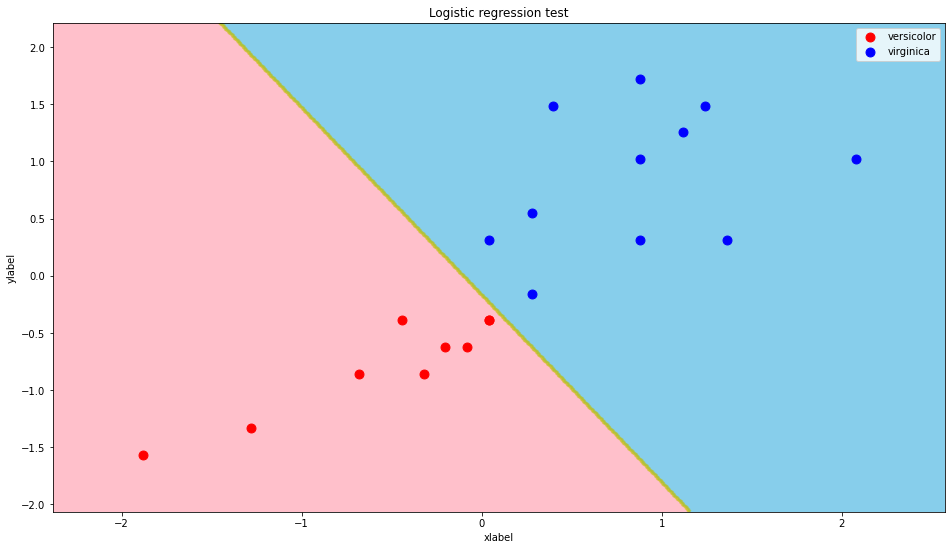

In [86]:

fit,ax = plt.subplots(figsize=(16,9))
decision_region(X_test,y_pred,classifier,title='Logistic regression test')

## [Problem 8] (Advance assignment) Saving weights

In [93]:
np.load('theta.npy')


array([[19.37271702],
       [12.22285673],
       [13.6930292 ]])